# Forecast Airlines Passengers data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [1]:
import pandas as pd
import numpy as no
from numpy import sqrt
from pandas import Grouper
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from pandas.plotting import lag_plot
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
data = pd.read_excel("Airlines+Data.xlsx")
data

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


# EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [4]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [5]:
data.set_index('Month',inplace=True)
## making the month column as index

In [6]:
data.isnull().sum()

Passengers    0
dtype: int64

In [7]:
data[data.duplicated()]

,Passengers
Month,
1995-08-01,148
1995-12-01,118
1996-04-01,135
1996-08-01,170
1997-06-01,178
1997-08-01,199
1998-11-01,172
1999-02-01,196
1999-11-01,180


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-07-01,413
2002-08-01,405
2002-09-01,355


# Visualization

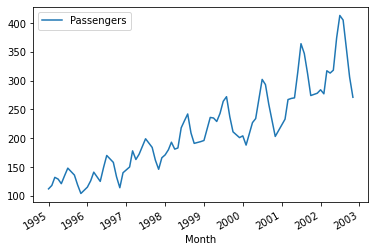

In [10]:
data.plot()
plt.show()

# 
Here we can see that the trend is upward and the seasonality is multiplicative.

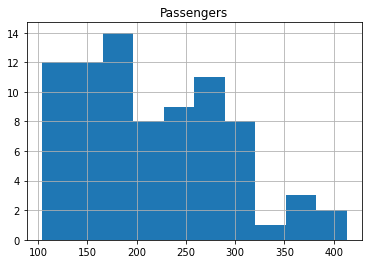

In [11]:
#Histogram
data.hist()
plt.show()

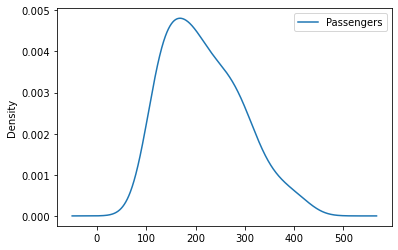

In [12]:
# Density plot
data.plot(kind='kde')
plt.show()


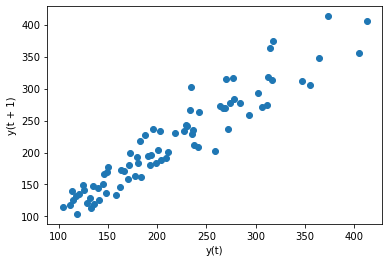

In [13]:
#Lag Plot
lag_plot(data)
plt.show()

In [14]:
from statsmodels.graphics.tsaplots import plot_acf

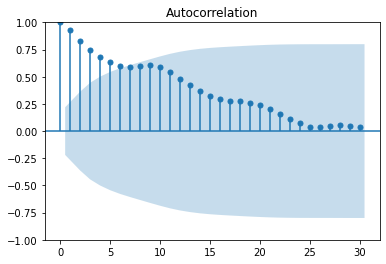

In [15]:
# Autocorrelation plot


plot_acf(data, lags=30)
plt.show()


# UpSampling


In [16]:
upsampled = data.resample('M').mean()
print(upsampled.head(30))

            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31         NaN
1995-09-30       136.0
1995-10-31       119.0
1995-11-30       104.0
1995-12-31         NaN
1996-01-31       115.0
1996-02-29       126.0
1996-03-31       141.0
1996-04-30         NaN
1996-05-31       125.0
1996-06-30       149.0
1996-07-31       170.0
1996-08-31         NaN
1996-09-30       158.0
1996-10-31       133.0
1996-11-30       114.0
1996-12-31       140.0
1997-01-31       145.0
1997-02-28       150.0
1997-03-31       178.0
1997-04-30       163.0
1997-05-31       172.0
1997-06-30         NaN


In [17]:
## interplation has done for nan values which we get after doing upsampling by month

In [18]:
interpolated = upsampled.interpolate(method='linear')
print(interpolated.head(10))


            Passengers
Month                 
1995-01-31       112.0
1995-02-28       118.0
1995-03-31       132.0
1995-04-30       129.0
1995-05-31       121.0
1995-06-30       135.0
1995-07-31       148.0
1995-08-31       142.0
1995-09-30       136.0
1995-10-31       119.0


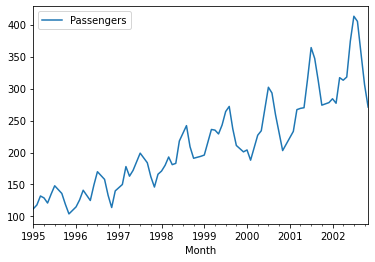

In [19]:
interpolated.plot()
plt.show()

# Transformations

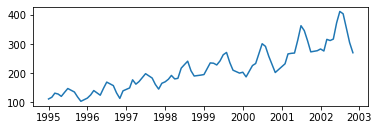

In [20]:
plt.subplot(211)
plt.plot(data)

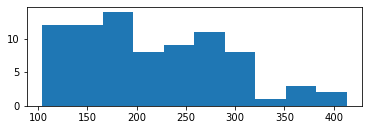

In [21]:
plt.subplot(212)
plt.hist(data)
plt.show()

# Square Root Transformation

In [22]:
df_new = pd.DataFrame(data.values)
df_new.columns = ['Passengers']
df_new['Passengers'] = sqrt(df_new['Passengers'])

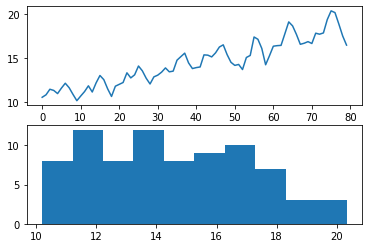

In [23]:
# line plot
plt.subplot(211)
plt.plot(df_new['Passengers'])
# histogram
plt.subplot(212)
plt.hist(df_new['Passengers'])
plt.show()

# Log Transform

In [24]:
from numpy import log

In [25]:
df_new = pd.DataFrame(data.values)
df_new.columns = ['Passengers']
df_new['Passengers'] = log(df_new['Passengers'])

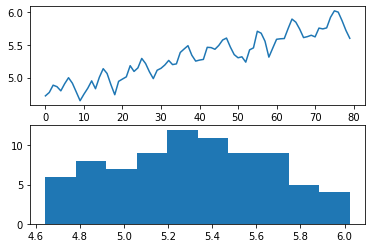

In [26]:
# line plot
plt.subplot(211)
plt.plot(df_new['Passengers'])
# histogram
plt.subplot(212)
plt.hist(df_new['Passengers'])
plt.show()

In [27]:
Train = interpolated.head(81)
Test  = interpolated.tail(14)

# Moving Average

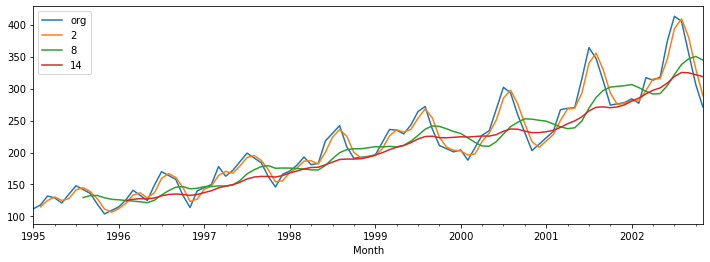

In [28]:
plt.figure(figsize=(12,4))
interpolated.Passengers.plot(label="org")
for i in range(2,18,6):
    interpolated["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

# Time series decomposition plot

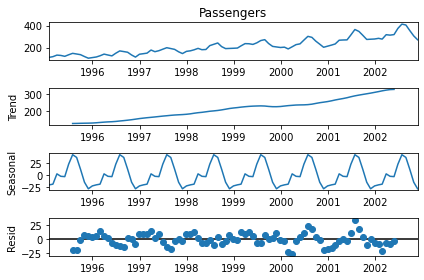

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(interpolated.Passengers)  
decompose_ts_add.plot()
plt.show()

# ACF plots and PACF plot

C:\Users\Shubh191\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


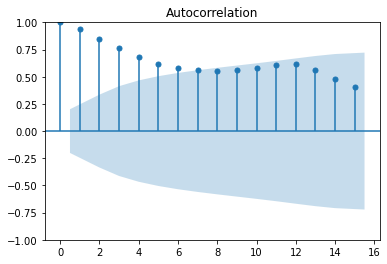

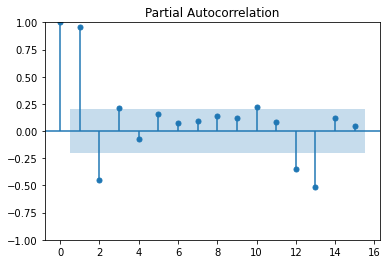

In [31]:
import statsmodels.graphics.tsaplots as tsa_plots

tsa_plots.plot_acf(interpolated.Passengers,lags=15)
tsa_plots.plot_pacf(interpolated.Passengers,lags=15)
plt.show()

# Evaluation Metric MAPE


In [32]:
def MAPE(pred,org):
    temp = no.abs((pred-org)/org)*100
    return no.mean(temp)

# Simple Exponential Method


In [33]:
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)

11.18163872245304

# Holt method

In [34]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers)

C:\Users\Shubh191\AppData\Local\Temp\ipykernel_4440\2337225878.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Passengers"]).fit(smoothing_level=0.1, smoothing_slope=0.2)


12.424433798144065

# Holts winter exponential smoothing with additive seasonality and additive trend

In [35]:
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers)

C:\Users\Shubh191\AppData\Local\Temp\ipykernel_4440\3047529225.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) #add the trend to the model


3.5137294116145905

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [36]:
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2) 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers)

C:\Users\Shubh191\AppData\Local\Temp\ipykernel_4440\2440570425.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.2)


3.233265279220958

In [37]:
rmse_hwe_mul_add = sqrt(mean_squared_error(pred_hwe_mul_add,Test.Passengers))
rmse_hwe_mul_add

12.632689273066914

# Final Model by combining train and test

In [38]:
hwe_model_add_add = ExponentialSmoothing(interpolated["Passengers"],seasonal="add",trend="add",seasonal_periods=10).fit()


In [39]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

2002-12-31    277.622266
2003-01-31    287.256917
2003-02-28    289.965675
2003-03-31    295.622356
2003-04-30    295.392881
2003-05-31    293.476303
2003-06-30    289.139624
2003-07-31    286.989986
2003-08-31    289.144856
2003-09-30    289.281495
Freq: M, dtype: float64

In [40]:
interpolated.reset_index(inplace=True)

In [41]:
interpolated['t'] = 1

In [42]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,1
2,1995-03-31,132.0,1
3,1995-04-30,129.0,1
4,1995-05-31,121.0,1
...,...,...,...
90,2002-07-31,413.0,1
91,2002-08-31,405.0,1
92,2002-09-30,355.0,1
93,2002-10-31,306.0,1


In [44]:
for i,row in interpolated.iterrows():
  interpolated['t'].iloc[i] = i+1

C:\Users\Shubh191\AppData\Local\Temp\ipykernel_4440\4068087303.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated['t'].iloc[i] = i+1


In [45]:
interpolated

,Month,Passengers,t
0,1995-01-31,112.0,1
1,1995-02-28,118.0,2
2,1995-03-31,132.0,3
3,1995-04-30,129.0,4
4,1995-05-31,121.0,5
...,...,...,...
90,2002-07-31,413.0,91
91,2002-08-31,405.0,92
92,2002-09-30,355.0,93
93,2002-10-31,306.0,94


In [46]:
interpolated['t_sq'] = (interpolated['t'])**2

In [47]:
interpolated

,Month,Passengers,t,t_sq
0,1995-01-31,112.0,1,1
1,1995-02-28,118.0,2,4
2,1995-03-31,132.0,3,9
3,1995-04-30,129.0,4,16
4,1995-05-31,121.0,5,25
...,...,...,...,...
90,2002-07-31,413.0,91,8281
91,2002-08-31,405.0,92,8464
92,2002-09-30,355.0,93,8649
93,2002-10-31,306.0,94,8836


In [48]:
interpolated['month'] = interpolated.Month.dt.strftime("%b")
interpolated["year"] = interpolated.Month.dt.strftime("%Y")

In [49]:
interpolated

,Month,Passengers,t,t_sq,month,year
0,1995-01-31,112.0,1,1,Jan,1995
1,1995-02-28,118.0,2,4,Feb,1995
2,1995-03-31,132.0,3,9,Mar,1995
3,1995-04-30,129.0,4,16,Apr,1995
4,1995-05-31,121.0,5,25,May,1995
...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002
91,2002-08-31,405.0,92,8464,Aug,2002
92,2002-09-30,355.0,93,8649,Sep,2002
93,2002-10-31,306.0,94,8836,Oct,2002


In [50]:
months = pd.get_dummies(interpolated['month'])
months

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,0,0,0,0,0,1,0,0,0,0,0,0
91,0,1,0,0,0,0,0,0,0,0,0,0
92,0,0,0,0,0,0,0,0,0,0,0,1
93,0,0,0,0,0,0,0,0,0,0,1,0


In [51]:
months = months[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

In [52]:
Air = pd.concat([interpolated,months],axis=1)
Air

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0


In [54]:
Air['log_passengers'] = no.log(Air['Passengers'])

In [55]:
Air

,Month,Passengers,t,t_sq,month,year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,log_passengers
0,1995-01-31,112.0,1,1,Jan,1995,1,0,0,0,0,0,0,0,0,0,0,0,4.718499
1,1995-02-28,118.0,2,4,Feb,1995,0,1,0,0,0,0,0,0,0,0,0,0,4.770685
2,1995-03-31,132.0,3,9,Mar,1995,0,0,1,0,0,0,0,0,0,0,0,0,4.882802
3,1995-04-30,129.0,4,16,Apr,1995,0,0,0,1,0,0,0,0,0,0,0,0,4.859812
4,1995-05-31,121.0,5,25,May,1995,0,0,0,0,1,0,0,0,0,0,0,0,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,2002-07-31,413.0,91,8281,Jul,2002,0,0,0,0,0,0,1,0,0,0,0,0,6.023448
91,2002-08-31,405.0,92,8464,Aug,2002,0,0,0,0,0,0,0,1,0,0,0,0,6.003887
92,2002-09-30,355.0,93,8649,Sep,2002,0,0,0,0,0,0,0,0,1,0,0,0,5.872118
93,2002-10-31,306.0,94,8836,Oct,2002,0,0,0,0,0,0,0,0,0,1,0,0,5.723585


<AxesSubplot:xlabel='month', ylabel='year'>

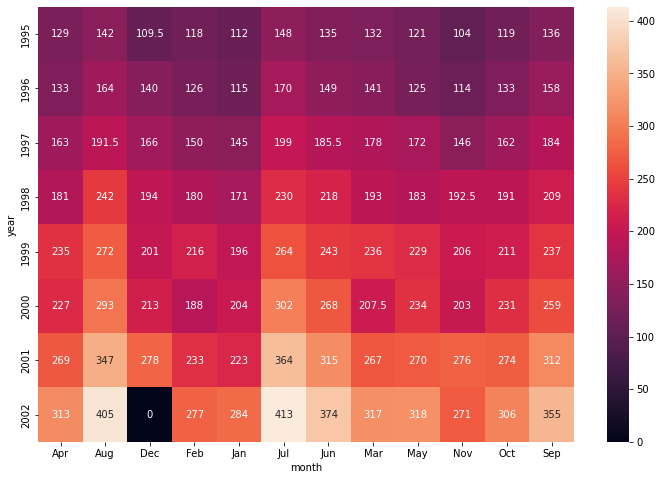

In [56]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

<AxesSubplot:xlabel='year', ylabel='Passengers'>

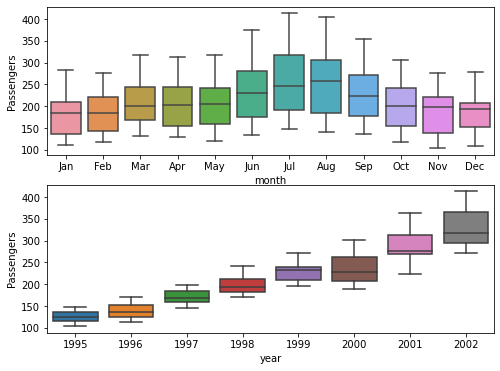

In [57]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data= Air)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Air)

<AxesSubplot:xlabel='year', ylabel='Passengers'>

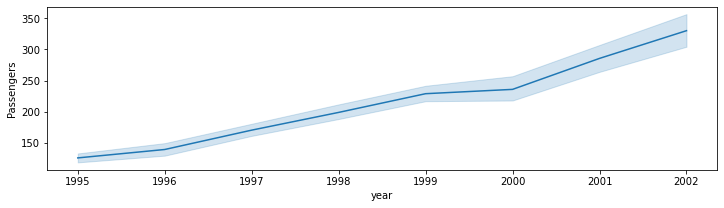

In [58]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Air)

# Splitting data


In [59]:
Train = Air.head(81)
Test = Air.tail(14)

In [61]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = no.sqrt(no.mean((no.array(Test['Passengers'])-no.array(pred_linear))**2))
rmse_linear

47.87107195088721

In [63]:
#Exponential
Exp = smf.ols('log_passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = no.sqrt(no.mean((no.array(Test['Passengers'])-no.array(no.exp(pred_Exp)))**2))
rmse_Exp

42.37179623821831

In [64]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_sq',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_sq"]]))
rmse_Quad = no.sqrt(no.mean((no.array(Test['Passengers'])-no.array(pred_Quad))**2))
rmse_Quad

42.70987042515201

In [65]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = no.sqrt(no.mean((no.array(Test['Passengers'])-no.array(pred_add_sea))**2))
rmse_add_sea

130.557623886014

In [66]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_sq+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_sq']]))
rmse_add_sea_quad = no.sqrt(no.mean((no.array(Test['Passengers'])-no.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

26.78537191152376

In [67]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = no.sqrt(no.mean((no.array(Test['Passengers'])-no.array(no.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.28596175917104

In [69]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = no.sqrt(no.mean((no.array(Test['Passengers'])-no.array(no.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

13.188070730263183

In [70]:
#Compareing the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,13.188071
4,rmse_add_sea_quad,26.785372
1,rmse_Exp,42.371796
2,rmse_Quad,42.709870
0,rmse_linear,47.871072
3,rmse_add_sea,130.557624
5,rmse_Mult_sea,137.285962


# rmse_multi_add_sea will be prefered than any other in this analysis